# Exploratory Data Analysis Of Walmart's Weekly Sales 

#### Author Plamen Angelov

### Dataset Description and Introduction

The dataset file contains data about the weekly sales of 45 different Walmart stores for the period of 3 years. It is the historical data that covers sales from 2010-02-05 to 2012-11-01, within this file the following fields can be found:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events
    - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
    - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
    - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

This jupyter notebook contains an exploratory analysis focusing on the historical data about the weekly sales of 45 different Walmart stores, for the period of three years, using different statistical methods and visualizations to gather insights and better understand the data.

## Setting up the environment

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Configurations
sns.set_style("white")
%matplotlib inline

## Loading the dataset

In [12]:
# Loading the csv file containing the data and transforming it into a pandas DataFrame
df = pd.read_csv(r'D:\Work\Data Science 2022\tasks\Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Adding detailed columns regarding the date

In [13]:
# Converting the date column to type Date
df.Date=pd.to_datetime(df.Date)
# Separating the month and year as separete columns
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


## Exploratory Data Analysis

#### Information about the containing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 502.9 KB


What this function tells us about the dataframe is that there are no null values, there is one column containing data of type - datetime, and the rest seem to be either of type float or int. There are a total of 10 columns and 6435 rows of data.

#### Basic Summary Statistics

In [7]:
round(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0,6435.0
mean,23.0,1046965.0,0.0,61.0,3.0,172.0,8.0,6.0,2011.0
std,13.0,564367.0,0.0,18.0,0.0,39.0,2.0,3.0,1.0
min,1.0,209986.0,0.0,-2.0,2.0,126.0,4.0,1.0,2010.0
25%,12.0,553350.0,0.0,47.0,3.0,132.0,7.0,4.0,2010.0
50%,23.0,960746.0,0.0,63.0,3.0,183.0,8.0,6.0,2011.0
75%,34.0,1420159.0,0.0,75.0,4.0,213.0,9.0,9.0,2012.0
max,45.0,3818686.0,1.0,100.0,4.0,227.0,14.0,12.0,2012.0


The table above shows that there are 45 different stores in the dataset (the maximum store ID is 45). The mean temperature measured across the dataset is 61 degrees Fahrenheit, which is about 16 degrees Celsius. The mean price per gallon of fuel is 3.00 and the weekly sales differ across the stores from 209.986 to 3.818.686, averaging at 1.046.965.

Since this exploratory analysis focuses on the data about the weekly sales of the stores, it is best to start from analyzing the sales trend of the data.

### Sales Trend

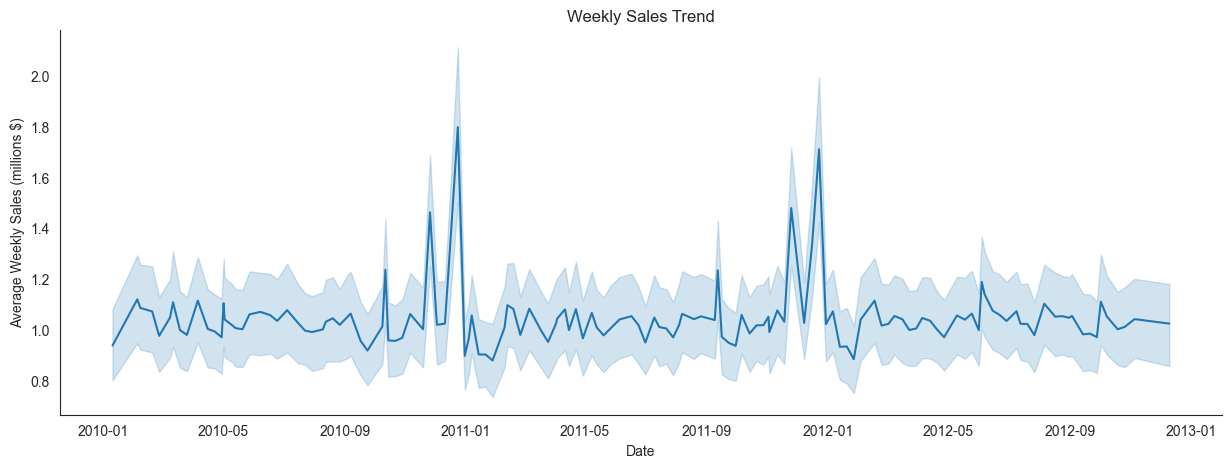

In [8]:
# Creating the sales trend plot
plt.figure(figsize=(15, 5))
trend = sns.lineplot(data=df, x='Date', y=(df.Weekly_Sales/1e6))
trend.set(xlabel='Date', ylabel='Average Weekly Sales (millions $)', title='Weekly Sales Trend')
# Removing borders
sns.despine()

On first glance, the weekly sales trend visualization above, shows spikes around the weeks inside the months of November and December each year, possibly due to the high number of people shopping for gifts in the winter holidays weeks.

### Analyzing the Sales Trend

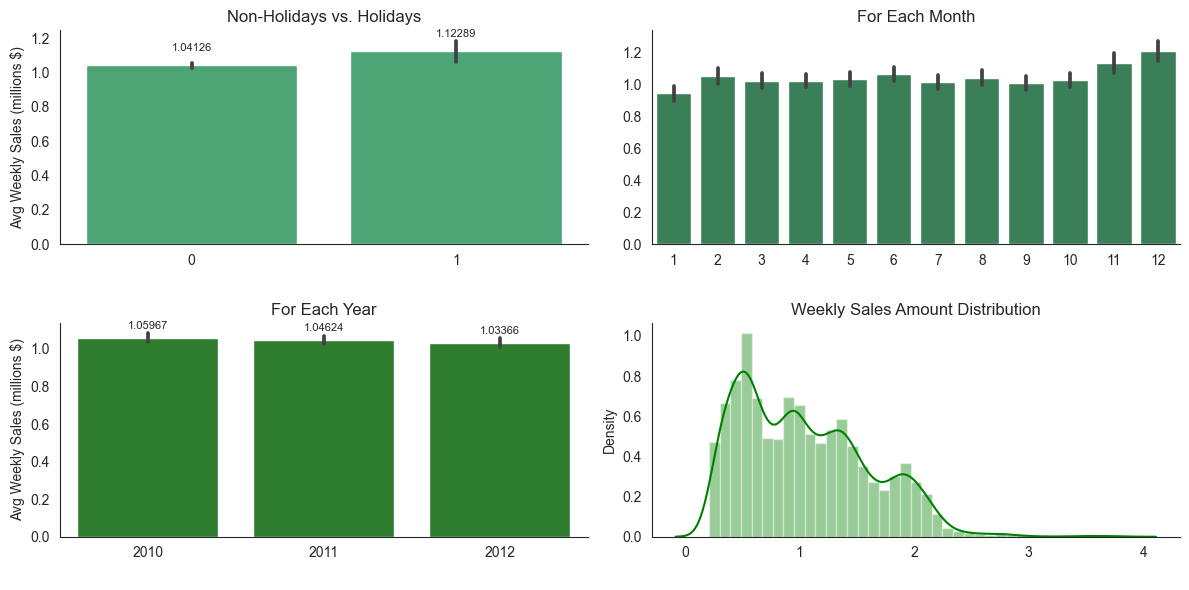

In [9]:
# Creating the plot
plt.figure(figsize=(12, 6))

# Weeks containg holidays vs. normal weeks
plt.subplot(221)
days_sales = sns.barplot(data=df, x='Holiday_Flag', y=(df.Weekly_Sales/1e6),color='mediumseagreen')
days_sales.set(ylabel='Avg Weekly Sales (millions $)', xlabel=' ', title='Non-Holidays vs. Holidays')
# Adding the bar values
for bar in days_sales.containers:
    days_sales.bar_label(bar, padding=9, fontsize=8)

# Average weekly sales per month
plt.subplot(222)
months_sales = sns.barplot(data=df, x='Month', y=(df.Weekly_Sales/1e6),color='seagreen')
months_sales.set(xlabel=' ',ylabel=' ', title='For Each Month')

# Average weekly sales per year
plt.subplot(223)
years_sales = sns.barplot(data=df, x='Year', y=(df.Weekly_Sales/1e6),color='forestgreen')
years_sales.set(ylabel='Avg Weekly Sales (millions $)', xlabel=' ', title='For Each Year', )
# Adding the bar values
for bar in years_sales.containers:
    years_sales.bar_label(bar, padding=5, fontsize=8)

# Sales Amount Distribution
plt.subplot(224)
dist_sales = sns.distplot((df.Weekly_Sales/1e6), color='g')
dist_sales.set(ylabel='Density', xlabel=' ', title='Weekly Sales Amount Distribution')

sns.despine()
plt.tight_layout()

The visualization above clearly shows that weeks which contain holidays, have on average higher weekly sales than weeks that do not have a holiday in them. It can also be seen that for the three years in the dataset, the month of December has the highest average weekly sales, followed by the month of November, as previously shown in the sales trend graph. The average weekly sales per year, seem to be slightly decreasing with each year, although it should be noted that there is no data for the month of December for the last year of 2012.

### Correlation Analysis

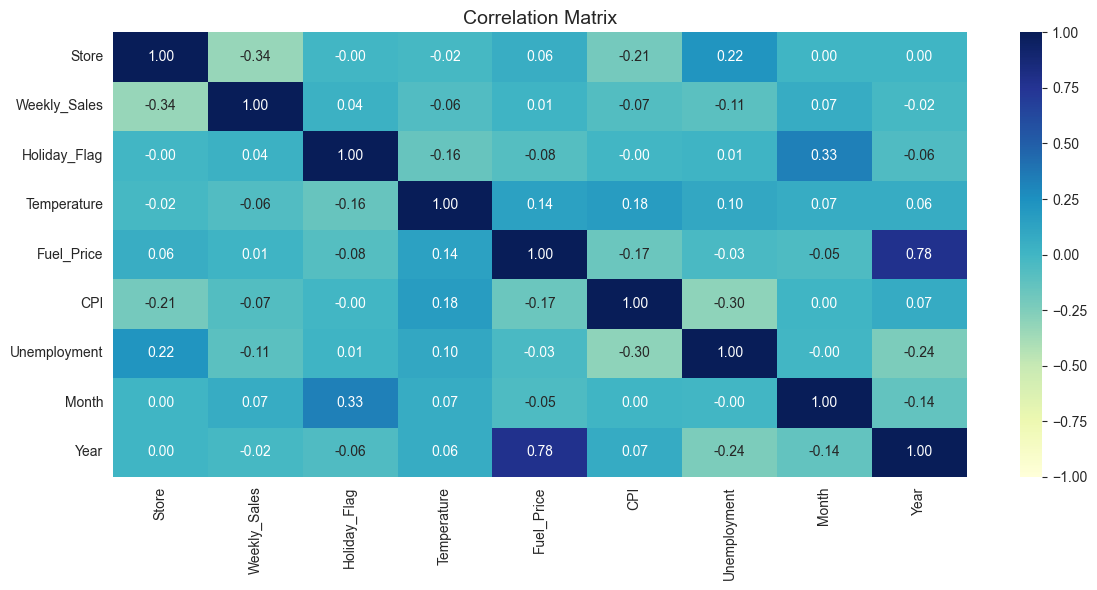

In [7]:
# Correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,6)) 
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu",vmin=-1,vmax=1,fmt=".2f")
ax.set_title("Correlation Matrix", fontsize=14)

plt.tight_layout()

The correlation matrix above displays the correlation coefficients for the different variables. The matrix depicts the correlations but when the number of variables is higher, sometimes it may be hard to read the insights. That is way the matrix can be unstacked in a table format.

In [8]:
# Unstacking the correlatin matrix for easier understanding
corr_unstacked = corr.unstack().abs()
ranked_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
ranked_corr = ranked_corr[ranked_corr != 1]
ranked_corr.head(10)

Year          Fuel_Price      0.779470
Fuel_Price    Year            0.779470
Store         Weekly_Sales    0.335332
Weekly_Sales  Store           0.335332
Holiday_Flag  Month           0.332234
Month         Holiday_Flag    0.332234
Unemployment  CPI             0.302020
CPI           Unemployment    0.302020
Year          Unemployment    0.241813
Unemployment  Year            0.241813
dtype: float64

The correlation analysis shows that the weekly sales do not have a strong correlation with any other variable in the dataset. The only noticable correlation being between the Year and Fuel Price variables.

### Weekly Sales Per Store

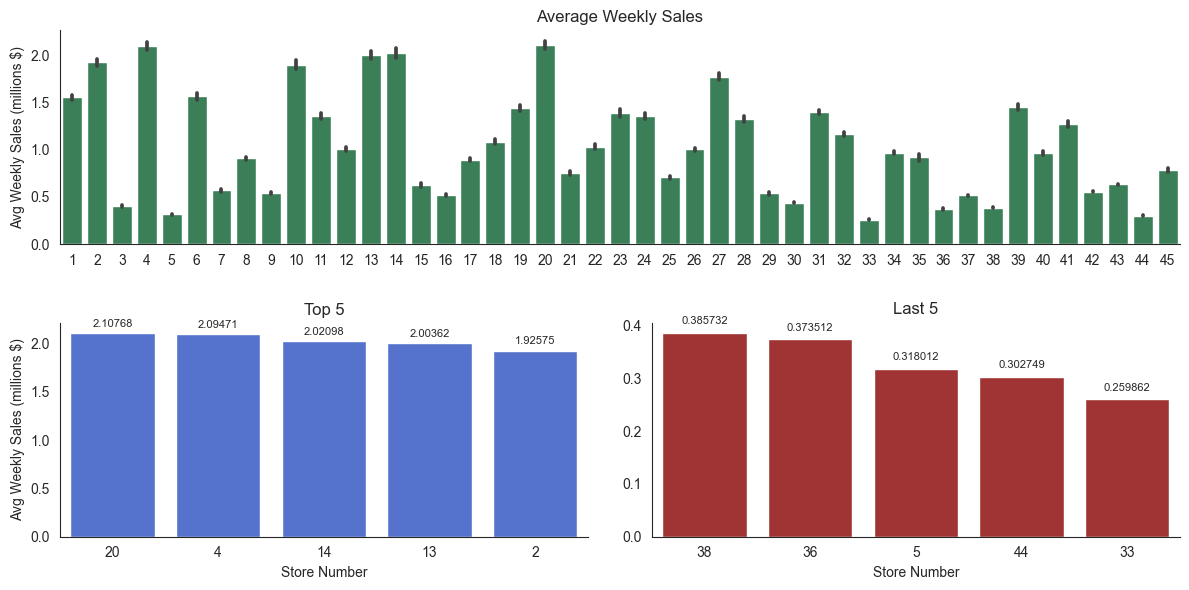

In [17]:
# Ordering the dataset by descending weekly sales
mean_df = df.groupby('Store').mean().sort_values(by='Weekly_Sales', ascending=False)
# Retrieving the top and last 5 
top_5 = mean_df.head()
last_5 = mean_df.tail()

# Creating the plot
plt.figure(figsize=(12, 6))

# Average weekly sales for each store
plt.subplot(211)
fig = sns.barplot(x='Store', y=(df.Weekly_Sales/1e6), data=df, color='seagreen')
fig.set(ylabel='Avg Weekly Sales (millions $)', xlabel='  ', title='Average Weekly Sales')

# Top 5 stores by average weekly sales
plt.subplot(223)
fig2 = sns.barplot(x=top_5.index, y=(top_5.Weekly_Sales/1e6), data=top_5, color='royalblue', order=top_5.index)
fig2.set(ylabel='Avg Weekly Sales (millions $)', xlabel='Store Number', title='Top 5')
for bar in fig2.containers:
    fig2.bar_label(bar, padding=3, fontsize=8)

# Last 5 stores by average weekly sales
plt.subplot(224)
fig3 = sns.barplot(x=last_5.index, y=(last_5.Weekly_Sales/1e6), data=last_5, color='firebrick', order=last_5.index)
fig3.set(ylabel=' ', xlabel='Store Number', title='Last 5')
for bar in fig3.containers:
    fig3.bar_label(bar, padding=5, fontsize=8)

sns.despine()
plt.tight_layout()


The graph above tells us that the average weekly sales highly differ from store to store, with the top 5 stores in terms of average weekly sales, all have more than two million $ (4/5). In the meantime, the last 5 stores in the average weekly sales ranking are far beneath their top counterparts, selling not even one quarter of their weekly sales.

### Analyzing Total Sales 

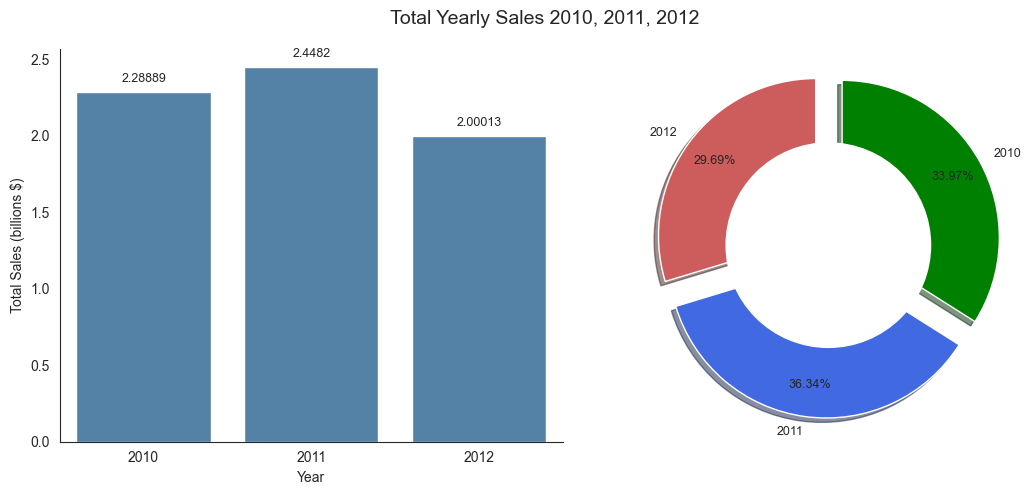

In [15]:
# Calculating the total sales per year
df_total = df.groupby('Year').sum().reset_index()

# Creating the plot
plt.figure(figsize=(11, 5))
plt.title('Total sales per month for 2010')

# Barplot for total sales per year
plt.subplot(121)
total_sales_years = sns.barplot(data=df_total, x='Year', y=(df_total.Weekly_Sales/1e9),color='steelblue')
total_sales_years.set(ylabel='Total Sales (billions $)', xlabel='Year')
for bar in total_sales_years.containers:
    total_sales_years.bar_label(bar, padding=5, fontsize=9)
    

# Piechart for sales every year
plt.subplot(122)
plt.pie(df_total['Weekly_Sales'], labels=df_total['Year'], 
        autopct='%.2f%%', startangle = 90, 
        counterclock=False,
        pctdistance=0.80,
        explode = [0.1, 0.1, 0.1],
        shadow = True,
        colors=['green','royalblue','indianred'],
        textprops={'fontsize': 9})
# Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.suptitle("Total Yearly Sales 2010, 2011, 2012", fontsize=14)    
sns.despine()
plt.tight_layout()

Visualizing the summed amount of sales for every year, shows that the year of 2011 had higher total sales than 2010 or 2012, although not by a lot. The percentage distribution on the right side of the graph displays pretty much evenly distributed shares of the total sales for the three years.

### Analayzing the monthly sales

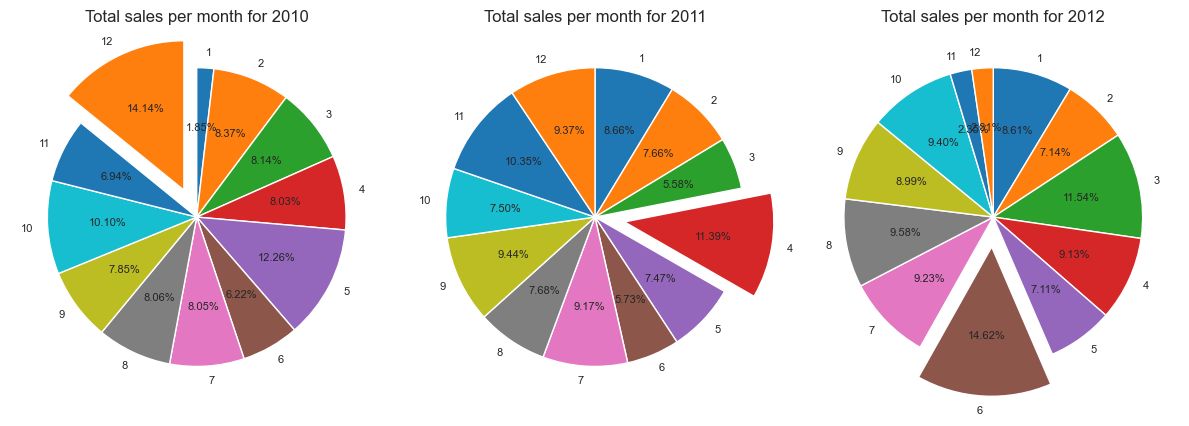

In [13]:
# Summing all the sales per months for the three years
df_total_2010 = df[df['Year'] == 2010].groupby('Month').sum().reset_index()
df_total_2011 = df[df['Year'] == 2011].groupby('Month').sum().reset_index()
df_total_2012 = df[df['Year'] == 2012].groupby('Month').sum().reset_index()

# Creating the plot
plt.figure(figsize=(12, 6))

# 2010 pie
plt.subplot(131)
plt.pie(df_total_2010['Weekly_Sales'], labels=df_total_2010['Month'], 
        autopct='%.2f%%', startangle = 90, 
        counterclock=False, explode=[0,0,0,0,0,0,0,0,0,0,0,0.2],
        textprops={'fontsize': 8})
plt.title('Total sales per month for 2010')

# 2011 pie 
plt.subplot(132)
plt.pie(df_total_2011['Weekly_Sales'], labels=df_total_2011['Month'], 
        autopct='%.2f%%', startangle = 90, 
        counterclock=False, explode=[0,0,0,0.2,0,0,0,0,0,0,0,0],
        textprops={'fontsize': 8})
plt.title('Total sales per month for 2011')

# 2012 pie
plt.subplot(133)
plt.pie(df_total_2012['Weekly_Sales'], labels=df_total_2012['Month'], 
        autopct='%.2f%%', startangle = 90,
        counterclock=False, explode=[0,0,0,0,0,0.2,0,0,0,0,0,0],
        textprops={'fontsize': 8})
plt.title('Total sales per month for 2012')
plt.tight_layout()

The visualization above shows that the most profitable month differs every year so no pattern can be seen in that aspect. Overall the distribution of percentages in regards to the total yearly sales, is more or less evenly distributed amongst the  twelve months each year.

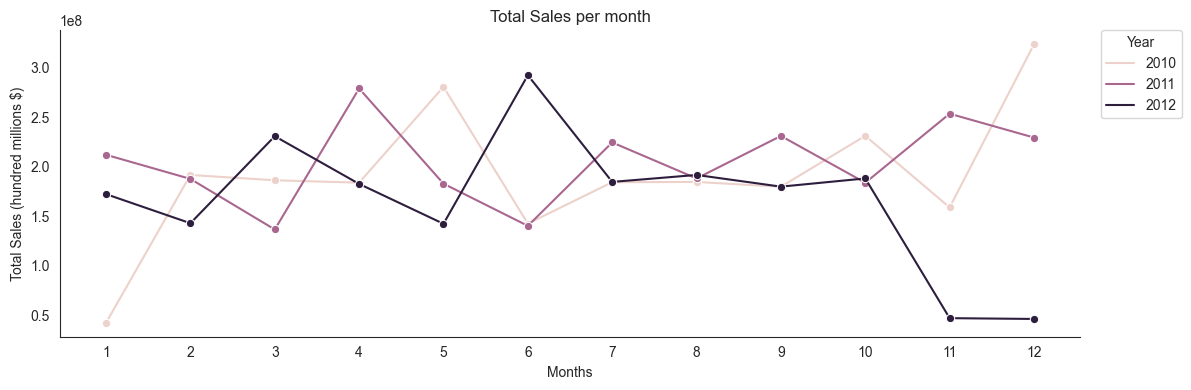

In [72]:
# Monthly sales line for each of three years 
plt.figure(figsize=(12,4))

# Calculating the total sales for each month
total_sales=df.groupby(['Year','Month'])['Weekly_Sales'].sum().to_frame()
df_total_sales=pd.DataFrame(total_sales)
df_total_sales=df_total_sales.reset_index()

# Plotting the line chart
line = sns.lineplot(data=df_total_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o', ci=None)
line.set(xlabel='Months', ylabel='Total Sales (hundred millions $)',title='Total Sales per month')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Year')
# Setting the x axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(steps=[1]))
# Removing borders
sns.despine()
plt.tight_layout()

The only month where the trend lines allign is the month of August, where in all three of the years, the sales amount seems to be similliar.

### Analyzing the top and last 5 stores each year

In [61]:
# Creating a function to extract the top 5 and the last 5 stores for each year
def top_last(year):
    """
    Definition: 
        Extracts the top 5 and the last 5 stores in terms of total sales for the given year

    Arguments:
        year (int): Year for which the sales will be calculated

    Returns:
        top5, last5 (dataframes): 2 pandas Dataframes containing the top 5 and last 5 stores for the given year
    """
    # Summing all the sales per store for the year
    df_total_stores = df[df['Year'] == year].groupby('Store').sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)
    # Sorting the top and last stores
    top5 = df_total_stores.head()
    last5 = df_total_stores.tail()
    return top5, last5

# Displaying the function
help(top_last)

Help on function top_last in module __main__:

top_last(year)
    Definition: 
        Extracts the top 5 and the last 5 stores in terms of total sales for the given year
    
    Arguments:
        year (int): Year for which the sales will be calculated
    
    Returns:
        top5, last5 (dataframes): 2 pandas Dataframes containing the top 5 and last 5 stores for the given year



In [62]:
# Extracting the top 5 and the last 5
top_5_2010, last_5_2010 = top_last(2010)
top_5_2011, last_5_2011 = top_last(2011)
top_5_2012, last_5_2012 = top_last(2012)

In [64]:
# Creating a function for plotting the graphs
def plot(graph):
    """
     Definition: 
        Creates a plot of the top 5 and the last 5 stores in terms of total sales for the year
        
    Args:
        graph (dataframe): A pandas Dataframe containing either the top or last 5 stores in terms of sales
    """
    # Specifiyng the colors for the top and last 5
    colors = ['firebrick' if x < 2*1e7 else 'royalblue' for x in graph.Weekly_Sales]
    # Creating the plot
    figure = sns.barplot(x=graph.index, y=(graph.Weekly_Sales), data=graph, color='b', order=graph.index, palette=colors)
    # Adjusting the names and labels of the graphs
    if id(graph) == id(last_5_2010) or id(graph) == id(last_5_2011) or id(graph) == id(last_5_2012):
        figure.set(ylabel=' ', xlabel=' ', title='Last 5')
    else:
        figure.set(ylabel='Total Sales', xlabel=' ', title='Top 5')
    if id(graph) == id(top_5_2012) or id(graph) == id(last_5_2012):
        figure.set(xlabel='Store Number')
    # Adding label values to the bars
    for bar in figure.containers:
        figure.bar_label(bar, padding=3, fontsize=7)
    sns.despine()
    plt.tight_layout()
    
# Displaying the function
help(plot)

Help on function plot in module __main__:

plot(graph)
     Definition: 
        Creates a plot of the top 5 and the last 5 stores in terms of total sales for the year
        
    Args:
        graph (dataframe): A pandas Dataframe containing either the top or last 5 stores in terms of sales



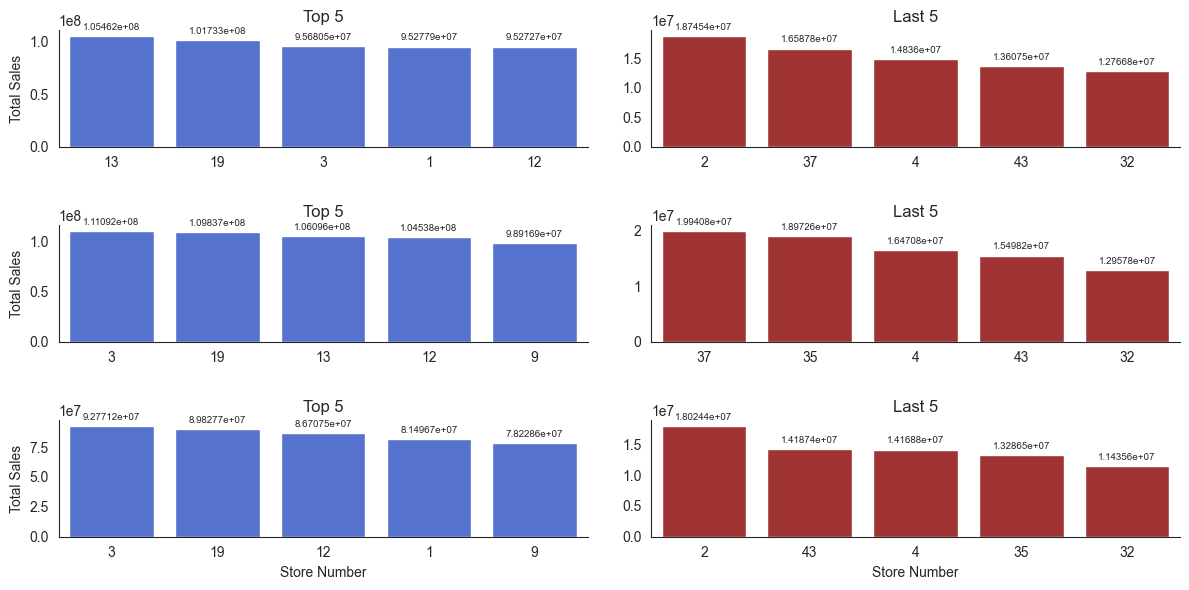

In [66]:
# Creating the plot
plt.figure(figsize=(12, 6))

# Listing the previously extracted dataframes
dataframes =[top_5_2010, last_5_2010, top_5_2011, last_5_2011, top_5_2012, last_5_2012,]
subplot = 320

# Plotting the dataframes with the top and last 5 stores for each year
for dtf in dataframes:
    subplot += 1
    plt.subplot(subplot)
    plot(dtf)


***
Made by: Plamen Angelov
***